In [1]:
# Import necessary libraries
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 1. Generate sample data
np.random.seed(42)  # For reproducibility

In [3]:
# Parameters
n_samples = 100
true_slope = 2.5
true_intercept = 5
noise_level = 3

In [4]:
# Generate x values
X = np.random.uniform(0, 10, n_samples)

In [5]:
# Generate y values with some noise to mimic "real world" phenomenon
y = true_slope * X + true_intercept + np.random.normal(0, noise_level, n_samples)

In [6]:
# Split into training and testing sets (80% train, 20% test)
split_idx = int(0.8 * n_samples)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [7]:
# 2. Initialize parameters. In training, these random values will be adjusted through gradient descent
weight = np.random.randn()  # coefficient/slope
bias = np.random.randn()  # intercept

In [8]:
# 3. Define model functions
def forward_pass(
    x: npt.NDArray[np.float64], weight: float, bias: float
) -> npt.NDArray[np.float64]:
    return x * weight + bias

In [9]:
def loss_calculation(
    y_pred: npt.NDArray[np.float64], y_true: npt.NDArray[np.float64]
) -> np.floating:
    return np.mean((y_pred - y_true) ** 2)

In [10]:
def parameter_update(
    w: float,
    b: float,
    x: np.ndarray,
    y: npt.NDArray[np.float64],
    y_pred: npt.NDArray[np.float64],
    learning_rate: float,
) -> tuple[float, float]:
    num_inputs = x.size
    derivative_weight = -2 / num_inputs * np.sum(x * (y - y_pred))
    derivative_bias = -2 / num_inputs * np.sum(y - y_pred)

    weight = w - learning_rate * derivative_weight
    bias = b - learning_rate * derivative_bias

    return (weight, bias)

In [11]:
# 4. Training loop
# Hyperparameters
learning_rate = 0.01
iterations = 1000

In [12]:
loss_history = []

In [13]:
for i in range(iterations):
    y_pred = forward_pass(X_train, weight, bias)
    loss = loss_calculation(y_pred, y_train)
    loss_history.append(loss)

    weight, bias = parameter_update(
        weight, bias, X_train, y_train, y_pred, learning_rate
    )

    if (i + 1) % 100 == 0:
        print(
            f"Iteration {i + 1}/{iterations}, Loss: {loss:.4f}, Weight: {weight:.4f}, Bias: {bias:.4f}"
        )

Iteration 100/1000, Loss: 8.3126, Weight: 2.6333, Bias: 3.5790
Iteration 200/1000, Loss: 7.3739, Weight: 2.4903, Bias: 4.5194
Iteration 300/1000, Loss: 7.0826, Weight: 2.4106, Bias: 5.0434
Iteration 400/1000, Loss: 6.9921, Weight: 2.3662, Bias: 5.3352
Iteration 500/1000, Loss: 6.9641, Weight: 2.3415, Bias: 5.4979
Iteration 600/1000, Loss: 6.9553, Weight: 2.3277, Bias: 5.5885
Iteration 700/1000, Loss: 6.9526, Weight: 2.3201, Bias: 5.6389
Iteration 800/1000, Loss: 6.9518, Weight: 2.3158, Bias: 5.6670
Iteration 900/1000, Loss: 6.9515, Weight: 2.3134, Bias: 5.6827
Iteration 1000/1000, Loss: 6.9515, Weight: 2.3121, Bias: 5.6914


In [14]:
print(f"Final parameters: Weight = {weight:.4f}, Bias = {bias:.4f}")
print(f"True parameters: Weight = {true_slope:.4f}, Bias = {true_intercept:.4f}")

Final parameters: Weight = 2.3121, Bias = 5.6914
True parameters: Weight = 2.5000, Bias = 5.0000


5. Visualization
TODO: Plot original data points and final regression line
TODO: Plot loss over iterations

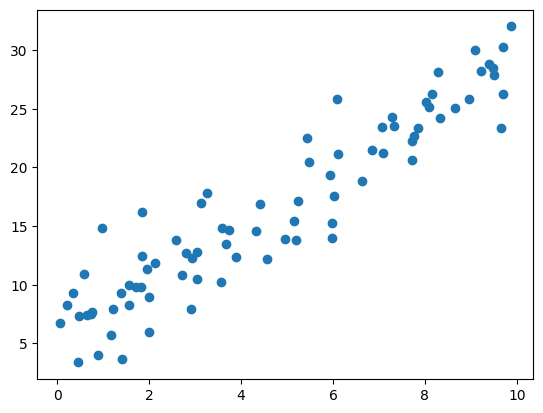

In [20]:
plt.scatter(X_train, y_train)

6. (Optional) Do this in a jupyter notebook
TODO: convert this python script to a jupyter notebook to test inputs and outputs at each step